In [41]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#linregress
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [4]:
file_one = Path("C:/Users/jwlos/OneDrive/Desktop/Bootcamp/projects/project-1-group17/global-data.csv")
raw_df = pd.read_csv(file_one, encoding="UTF-8")
raw_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Singapore,2000,100.0,100.0,37.95,NaN,0.33,29.00,0.0,0.0,...,109289.080,3.46,42120.00000,0.176538,9.039147,23852.32703,"8,358",716.0,1.352083,103.819836
1,Singapore,2001,100.0,100.0,37.50,NaN,0.60,32.05,0.0,0.0,...,121494.555,3.99,42030.00000,0.300129,-1.069016,21700.02005,"8,358",716.0,1.352083,103.819836
2,Singapore,2002,100.0,100.0,37.25,NaN,0.58,33.53,0.0,0.0,...,115456.870,3.81,41290.00092,0.305507,3.914610,22159.68886,"8,358",716.0,1.352083,103.819836
3,Singapore,2003,100.0,100.0,37.03,NaN,0.58,34.21,0.0,0.0,...,107484.375,4.41,38159.99985,0.338367,4.535780,23730.15245,"8,358",716.0,1.352083,103.819836
4,Singapore,2004,100.0,100.0,36.60,NaN,0.53,35.56,0.0,0.0,...,119262.510,4.82,39619.99893,0.292528,9.819592,27608.53737,"8,358",716.0,1.352083,103.819836


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
# drop Renewables (% equivalent primary energy) 
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
# repleaced nulls with zeros on Renewable-electricity-generating-capacity-per-capita
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 


In [9]:
# drop Renewables (% equivalent primary energy) 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [36]:
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
mask = pd.isna(new_data_df["Financial flows to developing countries (US $)"])
new_data_df.loc[mask, "Financial flows to developing countries (US $)"] = 0

new_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3648 non-null   object 
 1   Year                                                              3648 non-null   int64  
 2   Access to electricity (% of population)                           3638 non-null   float64
 3   Access to clean fuels for cooking                                 3479 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3648 non-null   float64
 5   Financial flows to developing countries (US $)                    3648 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3454 non-null   float64
 7   Electricity from fossil fuels (TWh)   

In [24]:
mask = pd.isna(new_data_df["Renewable-electricity-generating-capacity-per-capita"])
new_data_df.loc[mask, "Renewable-electricity-generating-capacity-per-capita"] = 0

print(new_data_df['Renewable-electricity-generating-capacity-per-capita'].tail())

3644     57.78
3645     79.31
3646     85.64
3647     84.37
3648    702.29
Name: Renewable-electricity-generating-capacity-per-capita, dtype: float64


In [32]:
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df.drop(new_data_df.columns[16], axis=1, inplace=True)

new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3648 non-null   object 
 1   Year                                                              3648 non-null   int64  
 2   Access to electricity (% of population)                           3638 non-null   float64
 3   Access to clean fuels for cooking                                 3479 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3648 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3454 non-null   float64
 7   Electricity from fossil fuels (TWh)   

In [37]:
new_data_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,Singapore,2000,100.0,100.0,37.95,0.0,0.33,29.00,0.0,0.0,0.0,109289.080,3.46,42120.00000,9.039147,23852.32703,716.0,1.352083,103.819836
1,Singapore,2001,100.0,100.0,37.50,0.0,0.60,32.05,0.0,0.0,0.0,121494.555,3.99,42030.00000,-1.069016,21700.02005,716.0,1.352083,103.819836
2,Singapore,2002,100.0,100.0,37.25,0.0,0.58,33.53,0.0,0.0,0.0,115456.870,3.81,41290.00092,3.914610,22159.68886,716.0,1.352083,103.819836
3,Singapore,2003,100.0,100.0,37.03,0.0,0.58,34.21,0.0,0.0,0.0,107484.375,4.41,38159.99985,4.535780,23730.15245,716.0,1.352083,103.819836
4,Singapore,2004,100.0,100.0,36.60,0.0,0.53,35.56,0.0,0.0,0.0,119262.510,4.82,39619.99893,9.819592,27608.53737,716.0,1.352083,103.819836


In [39]:
new_data_df.corr(numeric_only=True)

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124727,0.073045,0.086370,0.109879,-0.029048,0.032636,-0.004770,0.074006,0.030419,0.003143,-0.161402,0.024816,-0.192588,0.134870,-0.001521,0.003696,0.000582
Access to electricity (% of population),0.124727,1.000000,0.866535,0.147288,-0.025409,-0.784482,0.124019,0.128760,0.138110,-0.150891,0.455112,-0.252834,0.127031,-0.112075,0.418336,0.055045,0.420739,-0.103146
Access to clean fuels for cooking,0.073045,0.866535,1.000000,0.083305,-0.053531,-0.791677,0.100784,0.163550,0.124565,-0.119856,0.551563,-0.194709,0.095691,-0.145310,0.545021,0.074751,0.432971,-0.132265
Renewable-electricity-generating-capacity-per-capita,0.086370,0.147288,0.083305,1.000000,0.045990,0.113362,0.017687,-0.047468,0.098780,0.327398,-0.081197,-0.023821,0.018400,0.017825,-0.125711,0.035164,-0.169572,-0.027127
Financial flows to developing countries (US $),0.109879,-0.025409,-0.053531,0.045990,1.000000,0.064761,0.101773,-0.009964,0.096872,0.021144,-0.096157,-0.004874,0.106090,0.040991,-0.093157,0.102758,-0.062145,0.021753
Renewable energy share in the total final energy consumption (%),-0.029048,-0.784482,-0.791677,0.113362,0.064761,1.000000,-0.134930,-0.136610,-0.068863,0.467688,-0.429171,0.246876,-0.132791,0.075217,-0.370242,-0.045528,-0.330432,0.018706
Electricity from fossil fuels (TWh),0.032636,0.124019,0.100784,0.017687,0.101773,-0.134930,1.000000,0.646716,0.845069,-0.063801,0.105820,0.030987,0.989742,0.020956,0.107920,0.627689,0.110989,0.045448
Electricity from nuclear (TWh),-0.004770,0.128760,0.163550,-0.047468,-0.009964,-0.136610,0.646716,1.000000,0.492005,0.071672,0.181431,-0.007538,0.598491,-0.048456,0.231645,0.473272,0.177938,-0.087063
Electricity from renewables (TWh),0.074006,0.138110,0.124565,0.098780,0.096872,-0.068863,0.845069,0.492005,1.000000,0.091401,0.120257,0.009376,0.856270,-0.002533,0.139930,0.704880,0.112797,-0.016299
Low-carbon electricity (% electricity),0.030419,-0.150891,-0.119856,0.327398,0.021144,0.467688,-0.063801,0.071672,0.091401,1.000000,-0.118526,0.047269,-0.054574,-0.015207,0.008715,0.044757,-0.029343,-0.044958


In [66]:
#1st regression Cleaning - GDP per Capita vs Electricity from fossil fuels (TWh)
data_2020 = new_data_df[new_data_df["Year"] == 2020]
data_2020_cleaned = data_2020.dropna(subset=["gdp_per_capita", "Electricity from fossil fuels (TWh)"])
#not incuding values over 1000 in visualto remove outliers 
data_2020_cleaned2 = data_2020_cleaned[data_2020_cleaned["Electricity from fossil fuels (TWh)"] < 1000]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
20,Singapore,2020,100.0,100.0,93.64,0.0,NaN,50.04,0.0,0.83,1.631610,154256.300,NaN,NaN,-5.391021,59797.752180,716.0,1.352083,103.819836
41,Bahrain,2020,100.0,100.0,6.13,0.0,NaN,29.85,0.0,0.01,0.033490,156095.800,NaN,NaN,-5.085180,20409.952800,765.0,26.066700,50.557700
62,Maldives,2020,100.0,99.2,31.10,0.0,NaN,0.57,0.0,0.04,6.557377,17308.588,NaN,NaN,-33.499902,6924.105745,298.0,3.202778,73.220680
83,Malta,2020,100.0,100.0,0.00,0.0,NaN,1.90,0.0,0.25,11.627907,72065.460,NaN,NaN,-7.001130,27884.642830,316.0,35.937496,14.375416
104,Bermuda,2020,100.0,NaN,0.00,0.0,NaN,0.00,0.0,0.00,NaN,46161.586,NaN,NaN,-6.344080,107079.479800,54.0,32.299507,-64.790337


The r-squared is: 0.024052848766106433


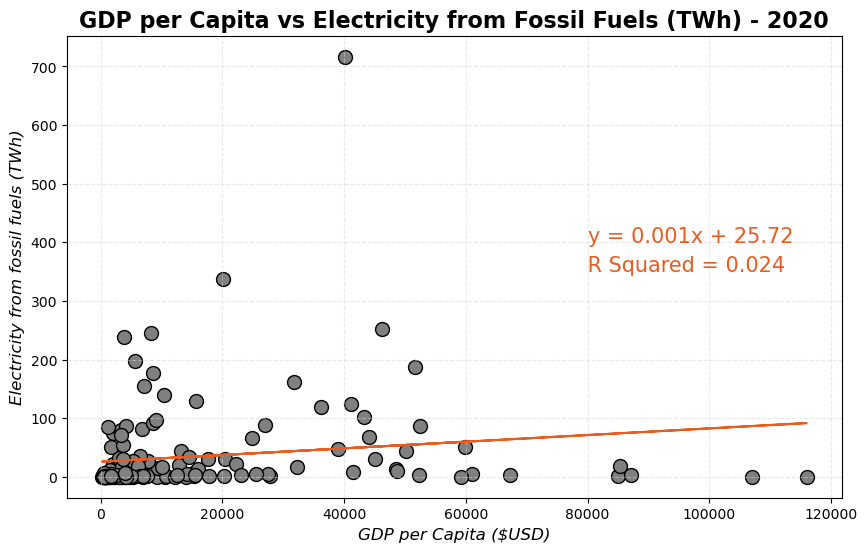

<Figure size 640x480 with 0 Axes>

In [139]:
#1st regression - GDP per Capita vs Electricity from fossil fuels (TWh)
#data_2020 = new_data_df[new_data_df["Year"] == 2020]
# data_2020_cleaned = data_2020.dropna(subset=["gdp_per_capita", "Electricity from fossil fuels (TWh)"])


# Get the x and y values for the plot
x_values = data_2020_cleaned2["gdp_per_capita"]
y_values = data_2020_cleaned2["Electricity from fossil fuels (TWh)"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="grey", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "#ea5c1f") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("GDP per Capita ($USD)", fontsize=12, fontstyle="italic")
plt.ylabel("Electricity from fossil fuels (TWh)", fontsize=12, fontstyle="italic")
plt.title("GDP per Capita vs Electricity from Fossil Fuels (TWh) - 2020", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

rvalue = rvalue**2

rsquared = round(rvalue,3)

plt.annotate(line_eq,(80000, 400),fontsize=15,color="#ea5c1f")
plt.annotate(f" R Squared = {rsquared}", (79000, 350), fontsize=15, color="#ea5c1f")

print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('GDBvsFossilFuels_plot.png')  # Save as PNG file

In [71]:
#2nd regression clearning - "Electricity from renewables (TWh)"
renew_data_2020 = new_data_df[new_data_df["Year"] == 2020]
renew_data_2020 = data_2020.dropna(subset=["gdp_per_capita", "Electricity from renewables (TWh)"])
renew_data_2020_2 = renew_data_2020[renew_data_2020["Electricity from renewables (TWh)"] < 500]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
20,Singapore,2020,100.0,100.0,93.64,0.0,NaN,50.04,0.0,0.83,1.631610,154256.300,NaN,NaN,-5.391021,59797.752180,716.0,1.352083,103.819836
41,Bahrain,2020,100.0,100.0,6.13,0.0,NaN,29.85,0.0,0.01,0.033490,156095.800,NaN,NaN,-5.085180,20409.952800,765.0,26.066700,50.557700
62,Maldives,2020,100.0,99.2,31.10,0.0,NaN,0.57,0.0,0.04,6.557377,17308.588,NaN,NaN,-33.499902,6924.105745,298.0,3.202778,73.220680
83,Malta,2020,100.0,100.0,0.00,0.0,NaN,1.90,0.0,0.25,11.627907,72065.460,NaN,NaN,-7.001130,27884.642830,316.0,35.937496,14.375416
104,Bermuda,2020,100.0,NaN,0.00,0.0,NaN,0.00,0.0,0.00,NaN,46161.586,NaN,NaN,-6.344080,107079.479800,54.0,32.299507,-64.790337


The r-squared is: 0.07183073285292259


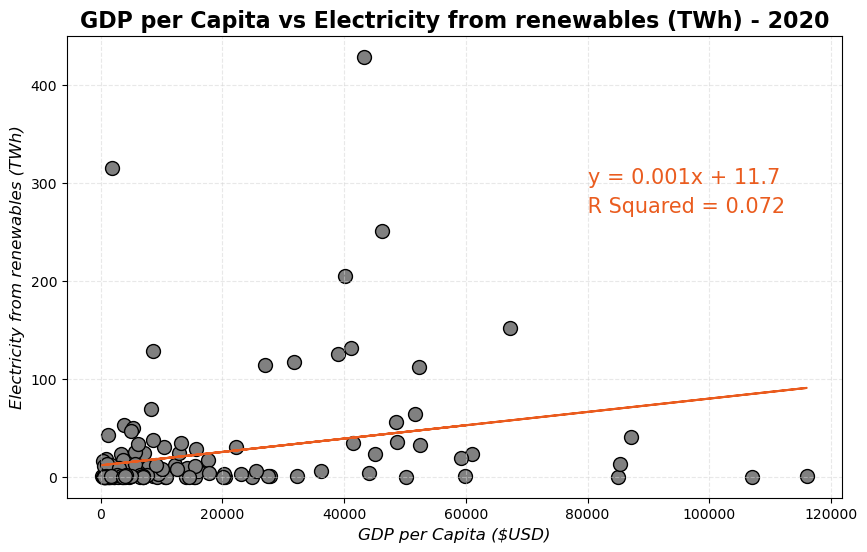

<Figure size 640x480 with 0 Axes>

In [141]:
#2nd regression - GDP per Capita vs "Electricity from renewables (TWh)"

# Get the x and y values for the plot
x_values = renew_data_2020_2["gdp_per_capita"]
y_values = renew_data_2020_2["Electricity from renewables (TWh)"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

line_eq_formatted = line_eq.format("{:.2f}")  # This formats the numbers to have 2 decimal places

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="grey", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "#ea5c1f") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("GDP per Capita ($USD)", fontsize=12, fontstyle="italic")
plt.ylabel("Electricity from renewables (TWh)", fontsize=12, fontstyle="italic")
plt.title("GDP per Capita vs Electricity from renewables (TWh) - 2020", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

rvalue = rvalue**2

rsquared = round(rvalue,3)

plt.annotate(line_eq_formatted, (80000, 300), fontsize=15, color="#ea5c1f")
plt.annotate(f" R Squared = {rsquared}", (79000, 270), fontsize=15, color="#ea5c1f")
print(f"The r-squared is: {rvalue}")
plt.show()
#plt.savefig('GDBvsRenewables_plot.png')  # Save as PNG file

In [136]:
leaderboard_df = renew_data_2020_2[renew_data_2020_2["Electricity from renewables (TWh)"] != 0]
leaderboard_df.count()

Entity                                                              147
Year                                                                147
Access to electricity (% of population)                             147
Access to clean fuels for cooking                                   142
Renewable-electricity-generating-capacity-per-capita                147
Financial flows to developing countries (US $)                      147
Renewable energy share in the total final energy consumption (%)      1
Electricity from fossil fuels (TWh)                                 147
Electricity from nuclear (TWh)                                      142
Electricity from renewables (TWh)                                   147
Low-carbon electricity (% electricity)                              147
Primary energy consumption per capita (kWh/person)                  147
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           1
Value_co2_emissions_kt_by_country                               

In [138]:
leaderboard2_df = data_2020_cleaned2[data_2020_cleaned2["Electricity from fossil fuels (TWh)"] != 0]
leaderboard2_df.count()

Entity                                                              148
Year                                                                148
Access to electricity (% of population)                             148
Access to clean fuels for cooking                                   143
Renewable-electricity-generating-capacity-per-capita                148
Financial flows to developing countries (US $)                      148
Renewable energy share in the total final energy consumption (%)      1
Electricity from fossil fuels (TWh)                                 148
Electricity from nuclear (TWh)                                      143
Electricity from renewables (TWh)                                   148
Low-carbon electricity (% electricity)                              148
Primary energy consumption per capita (kWh/person)                  148
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           1
Value_co2_emissions_kt_by_country                               